# Temporal and Spatial DataMining

## Exercise_06_Similarity

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from utils.TimeSeries import TS_1, TS_2
from scipy.linalg import norm
from matplotlib import cm

### Task 1: DTW

**a)** Understanding DTW

Explain the procedure of the DTW algorithm 

>**Tip:** Take a look at the lecture notes, in "Information Retrieval for Music and Motion" by Müller (Chapter 4, as an e-book in the library), in the "Everything you know about Dynamic Time Warping is Wrong" by Ratanamahatana and Keogh, in "Exact Indexing of Dynamic Time Warping" by Keogh.)

**Q1.** What is a "local cost function"?


 **---  Your Text Here ----** 


**Q2.** What is a "DTW matrix"?


 **---  Your Text Here ----** 


**Q3.** What is a warping path?


 **---  Your Text Here ----** 


**Q4.** What is indexing and what are "lower bounds"?


 **---  Your Text Here ----** 


**Q5.(UPDATE)** In which cases is it possible to obtain more than one warping path when calculating the similarity of two Time Series? What is the difference between the obtained paths?


 **---  Your Text Here ----** 


**Q6.** Is DTW robust against outliers? (that is, do outliers change the DTW value?)


 **---  Your Text Here ----** 


**Q7.** What is the difference between norm and metric?


 **---  Your Text Here ----** 


**Q8.** Is Euclidean Distance a Metric? What must be fulfilled to call a function  $d(\mathbf{x},\mathbf{y})$ a metric?


 **---  Your Text Here ----** 


**Q9.** Is DTW a metric?


 **---  Your Text Here ----** 


**b)** Implement the calculation of the accumulated cost matrix in the function **dtw**. Then execute the function with the given **x** and **y** values.

In [18]:
def dtw(x, y, dist, warp=1):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = np.zeros((r + 1, c + 1))
    D0[0, 1:] = np.inf
    D0[1:, 0] = np.inf
    D1 = D0[1:, 1:]  # view
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
    C = D1.copy()
    ####################
    for i in range(r):
        for j in range(c):
            if i == 0 and j == 0:
                D1[i, j] = C[i, j]
            elif i == 0:
                D1[i, j] = C[i, j] + D1[i, j-1]
            elif j == 0:
                D1[i, j] = C[i, j] + D1[i-1, j]
            else:
                D1[i, j] = C[i, j] + min(D1[i-1, j], D1[i, j-1], D1[i-1, j-1])
    ####################
    if len(x)==1:
        path = np.zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), np.zeros(len(x))
    else:
        path = _traceback(D0)
        
    return D1[-1, -1] / sum(D1.shape), C, D1, path

def _traceback(D):
    i, j = np.array(D.shape) - 2
    p, q = [i], [j]
    while (i > 0) or (j > 0):
        tb = np.argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if tb == 0:
            i -= 1
            j -= 1
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return np.array(p), np.array(q)


In [19]:
### test code zum Verständnis ###
D0 = np.zeros((6, 6))
D0[0, 1:] = np.inf
D0[1:, 0] = np.inf
print(D0)

D1 = D0[1:, 1:]
D1

[[ 0. inf inf inf inf inf]
 [inf  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.]]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
t1,c = TS_1(x1=5, samples=50)
t2,d = TS_2(x1=5, samples=40)

x=c.reshape(-1,1)
y=d.reshape(-1,1)

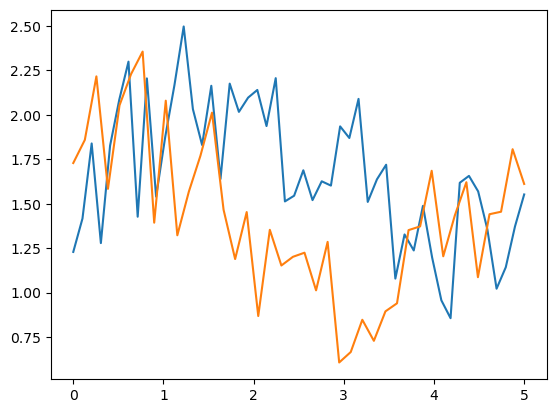

In [21]:
plt.plot(t1,c)
plt.plot(t2,d)

In [22]:
def simple_distance(X1, X2, p):
    return np.sum(np.abs(X1-X2)**p)**(1/p)

# plot the accumulated cost martix and the wrap path
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: simple_distance(x, y, 2))

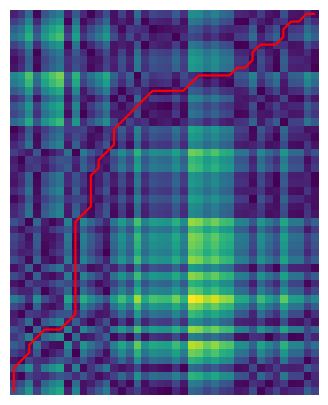

In [23]:
plt.figure(figsize=(10,5))
plt.imshow(cost, origin='lower')
plt.plot(path[1], path[0], color='r')
plt.axis('off')
plt.show()

### Task 2: LCSS

**a)** Implement the function **lcss** and output the longest subsequence of the two given sequences.

**Hint**:
[The lcss function defined](https://en.wikipedia.org/wiki/Longest_common_subsequence_problem):

1. $lcss(x_i, y_i)=\varnothing$, if $i = 0$ or $j = 0$
2. $lcss(x_i, y_i)=lcss(x_{i-1}, y_{j-1})^{\wedge}x_i$, if $i,j > 0$ and $x_i=y_j$
3. $lcss(x_i, y_i)=max\{lcss(x_i, y_{j-1}), lcss(x_{i-1}, y_j)\}$, if $i,j > 0$ and $x_i\neq y_j$


In [24]:
def lcss(x, y):
    '''
    x: a string with length of N
    y: a string with length of M
    Output: the longest subsequences.
    '''
    matrix = [''] * (len(x) + 1)
    for index_x in range(len(matrix)):
        matrix[index_x] = [''] * (len(y) + 1)
    
    ####################
    for i in range(len(x)+1):
        for j in range(len(y)+1):
            if i == 0 or j == 0:
                matrix[i][j] = ''
            elif x[i-1] == y[j-1]:
                matrix[i][j] = matrix[i-1][j-1] + x[i-1]
            else:
                matrix[i][j] = max(matrix[i-1][j], matrix[i][j-1], key=len)
    ####################
    print(np.array(matrix))
    return matrix[len(x)][len(y)]

In [25]:
x = "abcdef"
y = "adabceqdf"
print('The longest subsequences is:', lcss(x, y))

[['' '' '' '' '' '' '' '' '' '']
 ['' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']
 ['' 'a' 'a' 'a' 'ab' 'ab' 'ab' 'ab' 'ab' 'ab']
 ['' 'a' 'a' 'a' 'ab' 'abc' 'abc' 'abc' 'abc' 'abc']
 ['' 'a' 'ad' 'ad' 'ab' 'abc' 'abc' 'abc' 'abcd' 'abcd']
 ['' 'a' 'ad' 'ad' 'ab' 'abc' 'abce' 'abce' 'abcd' 'abcd']
 ['' 'a' 'ad' 'ad' 'ab' 'abc' 'abce' 'abce' 'abcd' 'abcdf']]
The longest subsequences is: abcdf


>LCSS Matrix:

```
[['', '', '', '', '', '', '', '', '', ''],
 ['', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'],
 ['', 'a', 'a', 'a', 'ab', 'ab', 'ab', 'ab', 'ab', 'ab'],
 ['', 'a', 'a', 'a', 'ab', 'abc', 'abc', 'abc', 'abc', 'abc'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abc', 'abc', 'abcd', 'abcd'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abce', 'abce', 'abcd', 'abcd'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abce', 'abce', 'abcd', 'abcdf']]
```

### Task 3: ED

**a)** Implement the function to calculate edit distance based on the following formulas:


1. $dist1 = ED(i-1, j-1)$, if $x_i=y_i$
2. $dist2 = ED(i-1, j-1) + 1$, (replace)
3. $dist3 = ED(i, j-1) + 1$, (insert)
4. $dist4 = ED(i-1, j) + 1$, (delete)

$ED(i,j) = min\{dist1, dist2, dist3, dist4\}$, with $ED(0,0)=0$, $ED(i,0)=i$ and $ED(0,j)=j$

In [26]:
def edit_distance(str_a,str_b):
    """
    :param str_a:
    :param str_b:
    :return: Edit distance
    """
    str_a = str_a.lower()
    str_b = str_b.lower()
    matrix_ed = np.zeros((len(str_a)+1, len(str_b)+1), dtype=int)
    matrix_ed[0] = np.arange(len(str_b)+1)
    matrix_ed[:,0] = np.arange(len(str_a)+1)
    
    for i in range(1, len(str_a)+1):
        for j in range(1, len(str_b)+1):
            d1 = matrix_ed[i-1][j-1]
            if str_a[i-1] != str_b[j-1]:
                d1 += 1
            d2 = matrix_ed[i][j-1] + 1
            d3 = matrix_ed[i-1][j] + 1
            matrix_ed[i][j] = min(d1, d2, d3)
            
    print(matrix_ed)        
    return matrix_ed[-1,-1]

**b)** Calculate the edit distance between x1 and x2.

In [27]:
x1 = 'love'
x2 = 'lolpe'

print('The edit distance between x1 and x2 is:', edit_distance(x1, x2))

[[0 1 2 3 4 5]
 [1 0 1 2 3 4]
 [2 1 0 1 2 3]
 [3 2 1 1 2 3]
 [4 3 2 2 2 2]]
The edit distance between x1 and x2 is: 2


>ED Matrix:

```
array([[0, 1, 2, 3, 4, 5],
       [1, 0, 1, 2, 3, 4],
       [2, 1, 0, 1, 2, 3],
       [3, 2, 1, 1, 2, 3],
       [4, 3, 2, 2, 2, 2]])
```

### Task 4: TWED (Bonus)

**a)** Read the paper entitled "Time Warp Edit Distance with Stiffness Adjustment for Time Series Matching" http://ieeexplore.ieee.org/Xplore/home.jsp of Pierre-François Marteau 
> Sections: **3, 3.1, and 4.1 - 4.4**

> Furthermore: Wikipedia [article](https://de.wikipedia.org/wiki/Time_Warp_Edit_Distance) on TWED. 

**b)** What is "Stiffness Adjustment"?

The stiffness $\nu$ expresses the cost/penalty of changing the time alignment.
- Lower $\nu$ allows more flexibility. 
- Higher $\nu$ penalizes time warping


**c)** Is TWED a metric? 

Yes, because for $\nu \geq 0$ it fulfills the characteristics of a metric:
- $\delta_{\lambda, \nu}(A, B) \geq 0$
- $\delta_{\lambda, \nu}(A, B) = 0 \iff A = B$
- $\delta_{\lambda, \nu}(A, B) \leq \delta_{\lambda, \nu}(A, C) + \delta_{\lambda, \nu}(C, B)$


**d)** Implement the TWED function. 

In [28]:
# not needed, redundant
def init_matrix(data):
    for i in range(len(data)):
        data[i][0] = float('inf')
    for i in range(len(data[0])):
        data[0][i] = float('inf')
    data[0][0] = 0
    return data


def lp_dist(time_pt_1, time_pt_2, p=2):
    """ Computes the LP distance between two points """
    return np.sum(np.abs(time_pt_1-time_pt_2)**p) ** (1/p)


def TWED(t1, t2, lam, nu):
    """"
    Requires: 
    t1: multivariate time series in numpy matrix format. 
    t2: multivariate time series in numpy matrix format. 
    lam: penalty lambda parameter, 
    nu: stiffness coefficient
    
    Returns the TWED distance between the two time series. 
    """
    t1_time, t1_data = t1
    t2_time, t2_data = t2

    t1_data = t1_data.reshape(-1,1)
    t2_data = t2_data.reshape(-1,1)

    # insert zero at the beginning
    t1_time = np.insert(t1_time, 0, 0, axis=0)
    t1_data = np.insert(t1_data, 0, 0, axis=0)
    t2_time = np.insert(t2_time, 0, 0, axis=0)
    t2_data = np.insert(t2_data, 0, 0, axis=0)

    N, M = len(t1_time), len(t2_time)
    result = np.zeros((N, M))
    result[0, 1:] = np.inf
    result[1:, 0] = np.inf

    for i in range(1, N):
        for j in range(1, M):
            # delete_A
            c1 = (
                result[i-1, j] 
                + lp_dist(t1_data[i-1], t1_data[i]) 
                + nu * (t1_time[i] - t1_time[i-1]) 
                + lam
            )

            # detete_B
            c2 = (
                result[i, j-1] 
                + lp_dist(t2_data[j-1], t2_data[j])
                + nu * (t2_time[j] - t2_time[j-1]) 
                + lam
            )

            # match
            c3 = (
                result[i-1, j-1] 
                + lp_dist(t1_data[i], t2_data[j]) 
                + lp_dist(t1_data[i-1], t2_data[j-1]) 
                + nu * (np.abs(t1_time[i] - t2_time[j]) + np.abs(t1_time[i-1] - t2_time[j-1]))
            )

            result[i, j] = min(c1, c2, c3)

    return result[N-1, M-1]

In [29]:
ts_1 = TS_1(x1=5, samples=50)
ts_2 = TS_2(x1=5, samples=50)

# calculate the distance between time series ts_1 and ts_2
TWED(ts_1, ts_2, lam=0.01, nu=0.01)

15.91264897151783

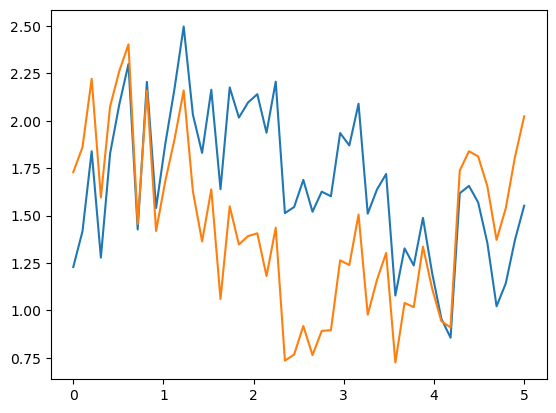

In [30]:
plt.plot(ts_1[0], ts_1[1])
plt.plot(ts_2[0], ts_2[1])

In [31]:
# try different values for lam and nu
lambdas = [0, 0.25, 0.5, 0.75, 1]
nus = [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1]

distances = np.array([[TWED(ts_1, ts_2, lam, nu) for lam in lambdas] for nu in nus])

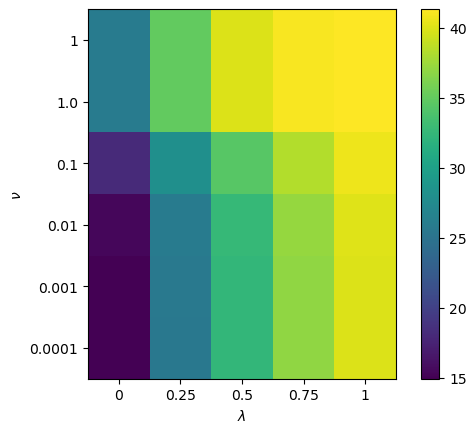

In [32]:
plt.imshow(distances, origin='lower')
plt.xlabel('$\lambda$')
plt.ylabel('$\\nu$')
plt.xticks(ticks=range(len(lambdas)), labels=lambdas)
plt.yticks(ticks=range(len(nus)), labels=nus)
plt.colorbar()
plt.show()